In [4]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers

from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix


img_size = (224,224)
batch = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/idea_1/train/',
    validation_split = 0.25,
    subset = 'training',
    seed=123,
    image_size= img_size,
    batch_size = batch,
    label_mode = 'binary'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data/validation/",
    validation_split = 0.25,
    subset = 'validation',
    seed=123,
    image_size= img_size,
    batch_size = batch,
    label_mode ='binary'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data/idea_1/test/",
    #seed=123,
    image_size= img_size,
    batch_size = batch,
    #label_mode = None
)

class_names = test_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


preprocess_input = tf.keras.applications.efficientnet.preprocess_input

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomFlip('vertical'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

base_model = tf.keras.applications.EfficientNetB0(input_shape = (224, 224, 3),
                                                    include_top = False,
                                                    weights = 'imagenet')

base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

inputs = tf.keras.Input(shape=(224,224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = prediction_layer(x)
outputs = tf.nn.sigmoid(x)
model = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy','Recall', 'Precision', 'FalsePositives', 'TruePositives', 'FalseNegatives'])

epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)



Found 701 files belonging to 2 classes.
Using 526 files for training.
Found 65 files belonging to 2 classes.
Using 16 files for validation.
Found 791 files belonging to 2 classes.
Epoch 1/100
33/33 [==============================] - 55s 1s/step - loss: 0.7631 - accuracy: 0.4715 - recall: 0.6499 - precision: 0.5778 - false_positives: 160.0000 - true_positives: 219.0000 - false_negatives: 118.0000 - val_loss: 0.7269 - val_accuracy: 0.4375 - val_recall: 0.6667 - val_precision: 0.5000 - val_false_positives: 6.0000 - val_true_positives: 6.0000 - val_false_negatives: 3.0000
Epoch 2/100
33/33 [==============================] - 37s 1s/step - loss: 0.6810 - accuracy: 0.5932 - recall: 0.7804 - precision: 0.6526 - false_positives: 140.0000 - true_positives: 263.0000 - false_negatives: 74.0000 - val_loss: 0.6524 - val_accuracy: 0.5625 - val_recall: 0.6667 - val_precision: 0.6000 - val_false_positives: 4.0000 - val_true_positives: 6.0000 - val_false_negatives: 3.0000
Epoch 3/100
33/33 [============

In [13]:
loss, accuracy, recall, precision, fp, tp, fn = model.evaluate(val_ds)
print('Test accuracy :', accuracy)
print('Test recall :', recall)
print('Test precision :', precision)
print('False Positive :', fp)
print('True Positive :', tp)
print('False Negative :', fn)
tn = 144-fp-tp-fn
print('True Negative :', tn)
print('F1 :', (2*(precision*recall))/(precision + recall))

1/1 [==============================] - 1s 887ms/step - loss: 0.1335 - accuracy: 0.9375 - recall: 0.8889 - precision: 1.0000 - false_positives: 0.0000e+00 - true_positives: 8.0000 - false_negatives: 1.0000
Test accuracy : 0.9375
Test recall : 0.8888888955116272
Test precision : 1.0
False Positive : 0.0
True Positive : 8.0
False Negative : 1.0
True Negative : 135.0
F1 : 0.9411764743006353


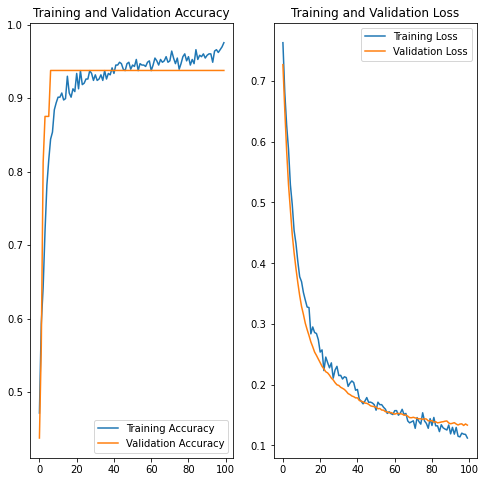

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

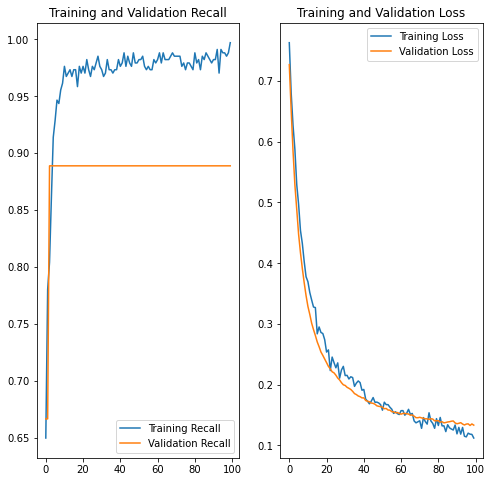

In [15]:
acc = history.history['recall']
val_acc = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Recall')
plt.plot(epochs_range, val_acc, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

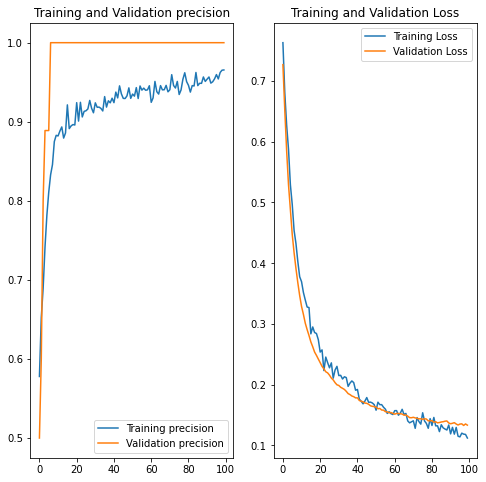

In [16]:
acc = history.history['precision']
val_acc = history.history['val_precision']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training precision')
plt.plot(epochs_range, val_acc, label='Validation precision')
plt.legend(loc='lower right')
plt.title('Training and Validation precision')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [5]:
loss, accuracy, recall, precision, fp, tp, fn = model.evaluate(test_ds)
print('Test accuracy :', accuracy)
print('Test recall :', recall)
print('Test precision :', precision)
print('False Positive :', fp)
print('True Positive :', tp)
print('False Negative :', fn)
tn = 144-fp-tp-fn
print('True Negative :', tn)
print('F1 :', (2*(precision*recall))/(precision + recall))

50/50 [==============================] - 45s 895ms/step - loss: 0.1155 - accuracy: 0.9671 - recall: 0.9641 - precision: 0.9691 - false_positives: 12.0000 - true_positives: 376.0000 - false_negatives: 14.0000
Test accuracy : 0.9671302437782288
Test recall : 0.964102566242218
Test precision : 0.969072163105011
False Positive : 12.0
True Positive : 376.0
False Negative : 14.0
True Negative : -258.0
F1 : 0.9665809770220991


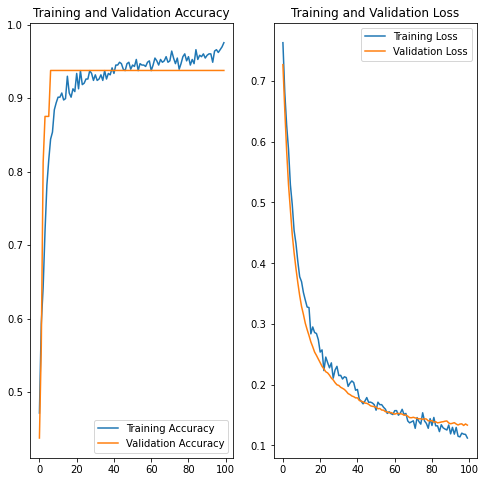

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

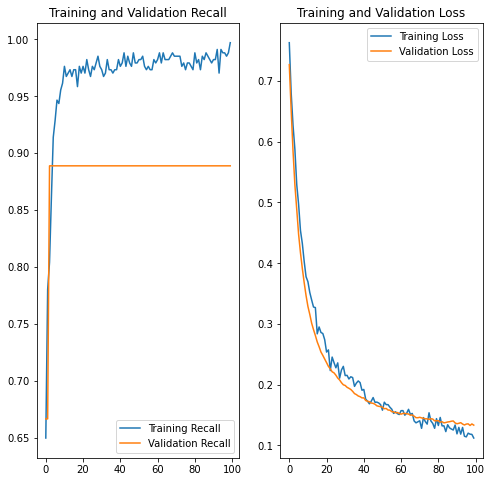

In [11]:
acc = history.history['recall']
val_acc = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Recall')
plt.plot(epochs_range, val_acc, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

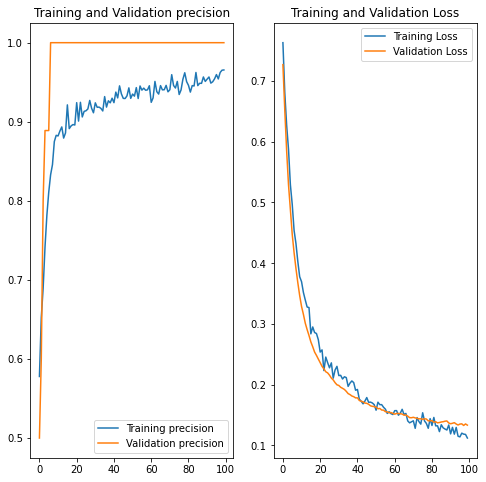

In [12]:
acc = history.history['precision']
val_acc = history.history['val_precision']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training precision')
plt.plot(epochs_range, val_acc, label='Validation precision')
plt.legend(loc='lower right')
plt.title('Training and Validation precision')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
model.save('train_w/idea1/exp1_app2.h5')

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers

from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix


img_size = (224,224)
batch = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/idea_1/train/',
    validation_split = 0.25,
    subset = 'training',
    seed=123,
    image_size= img_size,
    batch_size = batch,
    label_mode = 'binary'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data/validation/",
    validation_split = 0.25,
    subset = 'validation',
    seed=123,
    image_size= img_size,
    batch_size = batch,
    label_mode ='binary'
)

Found 701 files belonging to 2 classes.
Using 526 files for training.
Found 65 files belonging to 2 classes.
Using 16 files for validation.


In [3]:
class_names = train_ds.class_names
print(class_names)

['jaguar', 'no-jaguar']
